[*********************100%%**********************]  1 of 1 completed
C:\Users\sharv\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - loss: 0.0143
Epoch 2/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0013
Epoch 3/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0011
Epoch 4/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0012
Epoch 5/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 9.4374e-04
Epoch 6/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 9.6747e-04
Epoch 7/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 9.1112e-04
Epoch 8/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 7.1859e-04
Epoch 9/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0010
Epoch 10/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - loss: 0.0011
Epoch 11/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 6.7804e-04
Epoch 12/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - loss: 8.7201e-04
Epoch 13/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - loss: 7.6145e-04
Epoch 14/25
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - loss: 7.6462e-04
Epoch 15/25
77/77 ━━━━━━━━━━━━━━━━━━

[*********************100%%**********************]  1 of 1 completed


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


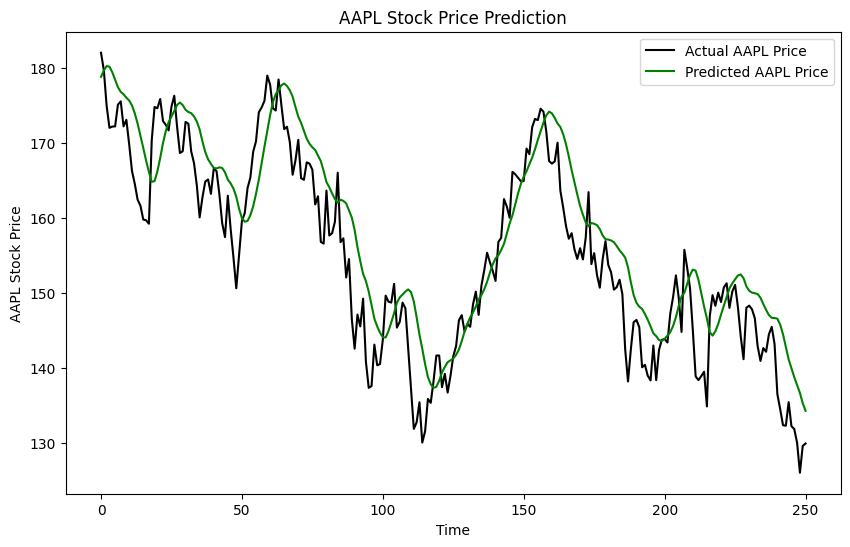

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf

# Load the data
df = yf.download('AAPL', start='2012-01-01', end='2021-12-31')

# Prepare the data
data = df['Close'].values
data = data.reshape(-1, 1)

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []
for i in range(60, len(scaled_data)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=25, batch_size=32)

# Testing the model on new data
test_start = '2022-01-01'
test_end = '2023-01-01'

test_data = yf.download('AAPL', start=test_start, end=test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - 60:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

x_test = []
for i in range(60, len(model_inputs)):
    x_test.append(model_inputs[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, color='black', label='Actual AAPL Price')
plt.plot(predicted_prices, color='green', label='Predicted AAPL Price')
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAPL Stock Price')
plt.legend()
plt.show()

